## **Report on Academic Paper Ranking and Recommendation System**
I pledge my honor that I have abided by the Stevens Honor System.
#### Authors: Christopher Tarabay, Gianangelo Dichio, Shudhanshu Ranjan

# **Section 1: Report**

### **Abstract**

Academic research is a key component in the advancing of innovative technologies in a variety of industries and a signifier of the state of human knowledge. This report aims to help researchers efficiently find high impact research papers to read and use for their research. ArXiv, a free and open-access archive for 2,180,040 scholarly articles in various STEM fields, provides a dataset of high energy physics meta data including but not limited to abstracts, titles, authors and citations. Visualization and Application techniques were used with abstract and citation data to give insight into the connection between papers and their impact quality. With a dataset containing over 1.7 million STEM-related papers, sparsity in data arises, justifying tools such as TF-IDF, WordVectorizer, and PageRank to find the connections between papers and their impact.

### **Dataset**

There are two datasets used, the first contains up-to-date arXiv metadata  including but not limited to title, abstract, category, and authors information. An example datapoint within the set is,

"root":{\
"id":"0704.0001",\
"submitter":"Pavel Nadolsky",\
"authors":"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",\
"title":"Calculation of prompt diphoton production cross sections at Tevatron and LHC energies",\
"comments":"37 pages, 15 figures; published version",\
"journal-ref":"Phys.Rev.D76:013009,2007",\
"doi":"10.1103/PhysRevD.76.013009",\
"abstract":" A fully differential calculation in perturbative quantum chromodynamics is presented for the production of massive photon pairs at hadron colliders. All next-to-leading order perturbative contributions from quark-antiquark, gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as all-orders resummation of initial-state gluon radiation valid at next-to-next-to-leading logarithmic accuracy. The region of phase space is specified in which the calculation is most reliable. Good agreement is demonstrated with data from the Fermilab Tevatron, and predictions are made for more detailed tests with CDF and DO data. Predictions are shown for distributions of diphoton pairs produced at the energy of the Large Hadron Collider (LHC). Distributions of the diphoton pairs from the decay of a Higgs boson are contrasted with those produced from QCD processes at the LHC, showing that enhanced sensitivity to the signal can be obtained with judicious selection of events. ",\
"report-no":"ANL-HEP-PR-07-12",\
"categories":[
0:"hep-ph"
],\
"versions":[
0:"v1"
1:"v2"
],\
}


For this study, we use the "hep-ph" (High Energy Physics) category, with a sample size of $n=78,014$. Preprocessing includes cleaning abstracts to retain useful keyworks related to the category, such as "model", "neutrino", "higgs", then reducing the unique word count down from $33161$ to $3718$, through analysis of word frequency.

<center> <img src="https://drive.google.com/uc?id=1tZ9of6ukueSozO2wFyPyAqmur2zrcOks" alt="word freq."> </center>
<center> Sharp curve displays that words with less than ~100 occurances make up 90% of the words. </center>


The second dataset is an older copy of the metadata that also includes citation data. This dataset was used with WordVectorizer and PageRank implementations to find similarities in meaning between papers and the most cited papers within the dataset. The sample size in the second dataset is $n=1,644,669$. The citation data is a dictionary pointing from a paper's ArXiv ID to the cited paper's ID within the paper. Many papers in the dictionary only cited themselves or had no citations. This greatly reduced the dimensions of the dataset bringing it down to $n=864,117$. Upon further inspection, the papers with no outside citations did have citations within their paper, however, they were not within the ArXiv Database. This means that those papers did not have a paper ID and could not be added to the dataset. An example datapoint would be,


"hep-lat/0403001":[\
  "hep-lat/0305022",\
  "cond-mat/9702070",\
  "hep-lat/0312035",\
  "hep-lat/0403001",\
  "hep-lat/0311039",\
  "hep-lat/9710001",\
  "cond-mat/9705295"]


The hep-lat, high energy physics, papers did not only cite other high energy physics papers, making the data set more difficult to operate with due to the fact that list of papers and the list of citations are not equal.

 Similar preprocessing is used for abstract information, applied in WordVectorizer.


### **Methodology**

The approach used for this study includes TF-IDF, NMF factorization, WordVectorizer and PageRank. Using TF-IDF and NMF Factorization, we are able to create features out of NMF: $V \approx WH$, $W$ matrix, which contains "dictionary" information, in terms of TF-IDF matrix $V$, allowing us to create topic clustering between the top $k=25$ words related to High Energy Physics category. Another practical use of the $W$ matrix is for creating a Recommender System, such that given a paper title, it finds the most similar papers ranked by cosine distance. Furthermore, cosine distance also allows us to find similar titles to a given user query, leading to the final result of a paper "search engine" that finds similar paper names, and their related papers.

(APPROACH FOR USING WORDVECTORIZER)

The approach used for this study includes TF-IDF, NMF factorization, WordVectorizer and PageRank.

In finding the impact of individual papers, a Page Rank method was used. INitial attempt were to build a Coordinate form representation of the data, that is, every paper is given a column index, row index, and value. The representation would then be converted to a link matrix from papers to citations. The final step would be to go through Page Rank provess,and find eigenvalues. This process turned out to be too heavy on the system and another method was proposed. 

A CSR representation of data, and the power method for page rank were the right methods for the given task. A CSR representation of a data point is given by a row pointer array(the amount of non-zero values per row), an array of column indeces, and an array of values.

<img src="https://op2.github.io/PyOP2/_images/csr.svg" width="90%" />

[Image Source](https://op2.github.io/PyOP2/_images/csr.svg)

The power method uses a CSR matrix and a random initialization for the dominant eigenvector. Through an iterative process with a maximum iteration, the pwoer method finds an optimized eigenvector.

### **Results and Observations**


Topic Clustering:

<div>
<img src="https://drive.google.com/uc?id=1JEF7wKYxB7vyNXWjj3-GPYLzhwCc-4P1" alt="topic clustering" width=600 height=600>
</div>

Above is the result of topic clustering for $k=25$ most relevant words for the High Energy Physics catergory. As seen there are many words that are related to more than one topic, while words that are less general tend to be near their own topic.

Recommeder System:

<div>
<img src="https://drive.google.com/uc?id=1-iagqzTbBA6VgkWKFIoQndyAREFUAIZq" alt="recommender" width=350 height=350>
</div>

Above the cosine difference of paper abstracts shows very promising results with most of the results having high correlation. Observing the titles, keywords such as "neutrinos" and "interaction" are picked up between the similar papers.

Paper Query:
<div>
<img src="https://drive.google.com/uc?id=1dxSDICvB-7-KRTrMCQWBRHh9XgW5PjSS" alt="query" width=350 height=350>
</div>

Above displays the results of page querying, it is succesful at finding similar titles given user input. Although the results of cosine difference show the lack of phrase correlation between the query and possible titles. As seen, it finds topics surrounding "neutrinos" and "supernovas" rather than "supernova neutrinos".



We used pretrained word2vec model by google for sentiment analysis.
[Source](https://code.google.com/archive/p/word2vec/)

Now, just to see how word embedding from word2vec works we have to refer the following two images:  
<img src="<img src="https://drive.google.com/file/d/1R2zMGm_EhgW_SHpsq4MCy-uGTkNyZkzf/view?usp=sharing" alt="Abstract to word tuples">" alt="Abstract to word tuples">

[Image Source](https://israelg99.github.io/2017-03-23-Word2Vec-Explained/)
<img src="<img src="https://drive.google.com/file/d/1D8F9WHacF7hOB-PbYbZyCwHscVpfoXsQ/view?usp=sharing" alt="Vector representation of the word tuples">" alt="Example of the vectors of word tuples">

[Image Source](https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/)

After the word tuples are obtained, they are then replaced by their word vectors, and then at the end we calculated the cosine similarity between the list of tuples of those abstract and got our results.

<center> <img src="https://drive.google.com/uc?id=1R2zMGm_EhgW_SHpsq4MCy-uGTkNyZkzf" alt="Target Word cloud"> </center>
<center> Word cloud of the target abstract</center>

<center> <img src="https://drive.google.com/uc?id=1KJNFWl8H16tgHFW0UtTLdrjvTfoAvPBD" alt="Target"> </center>
<center> Target abstract</center>


<center> <img src="https://drive.google.com/uc?id=1uaTqaD32cs80LxN8_TV0c_dgQGZTtBSp" alt="Most similar Word cloud"> </center>
<center> Word cloud of the most similar abstract</center>

<center> <img src="https://drive.google.com/uc?id=154RKxC2y7yY6Fw5Zc2-7w1GtcnaT0FAk" alt="Most similar"> </center>
<center> Most similar abstract</center>


<center> <img src="https://drive.google.com/uc?id=18rDJicNOoO-MQCHYsREBagSzUYOwXKL6" alt="2nd most similar Word cloud"> </center>
<center> Word cloud of the 2nd most similar abstract</center>

<center> <img src="https://drive.google.com/uc?id=154RKxC2y7yY6Fw5Zc2-7w1GtcnaT0FAk" alt="2nd most similar"> </center>
<center> 2nd most similar abstract</center>


<center> <img src="https://drive.google.com/uc?id=1ECOHi2ojan9JmKJa-fR2d8rg3eOdNN0U" alt="3rd most similar Word cloud"> </center>
<center> Word cloud of the 3rd most similar abstract</center>

<center> <img src="https://drive.google.com/uc?id=154RKxC2y7yY6Fw5Zc2-7w1GtcnaT0FAk" alt="3rd most similar"> </center>
<center> 3rd most similar abstract</center>

The results of Page Rank via power method and CSR representation successfully returned the top ranked papers within the dataset. The eigenvector nonsurprisingly returned very small equivalent components at 8 Significant Figures. Upon further inspection, the components showed differences at the 14th Significant Digit. This is because of the size and sparsity of the matrix. 

<div>
<img src='https://drive.google.com/uc?id=1z-UQ53Akv0YPacndWhkhNAUsvF-tBTSO' alt="ranks" width=600 height=75>
</div>

This result shows that, within this dataset, there are not many papers that have a much higher impact than the rest. Furthermore, due to the papers being in the isolated ArXiv database, the highest ranked paper is not as accurate as could be. The results are not very accurate due to the following;

  1. ### Not all the cited papers within papers were in the dataset. 
    There are unnaccounted for papers outside of the dataset.

  2. ### There are papers outside of the ArXiv database that cited a paper in the dataset.
    The papers within the dataset could be ranked higher.

  3. ### The papers within the ArXiv dataset are not peer reviewed or from credible journals.
    The papers themselves may not be credible.

These observations could be fixed by using a more credible research paper database with more papers such as Elsevier as they offer a paper citaion data API.

Another analysis that could be done on the data would be to build a dictionary from cited paper to papers so that the amount of papers that cite a given paper can be quantized and filtered.

  


### **Conclusion**


The application of NMF factorization as a precendant step for TFIDF is a major improvement to using TF-IDF alone, reducing memory restrictions, while also giving us key information, from a largly sparse dataset. Furthermore, NMF allows us to find similarties in words, in order to make representations of TD-IDF results, in the form of topic querying. Another benefit of NMF is it's use in making a Recommender System, similar to PCA, it finds relationships between the decomposition of the TF-IDF matrix, and uses cosine similarity as a metric for relevance between abstracts.

Considering the large dataset for just a single field hep-ph (High Energy Physics) among the ArXiv, it is clear that most of the data must be loaded beforehand, including NMF results for each field, to make it practical for real implementation. Another issue about TFiDF, it isn't robust to arrangement in documents, as a result, the example query from above "Supernova neutrinos", results it recommendations, that focus more on the "neutrino" aspect, rather than the whole phrase. Although one approach to fixing this would be using bigrams (TFIDF produces 2 word phrases, rather than just single words), neither is the abstract information reliable enough to handle two-word phrases, it doesn't fix the problem of a query with 3+ words.

Possible improvements to the model include using more modern NLP approachs, uniquely Neural Networks which have become the key application when dealing with textual information.

Another possible improvement for word2vec could be using word embedding from Bert model, since it's embedded representation could had better context then word2vec or TF-IDF, the information loss during abstract embedding could be further minimized. Also, we could try euclidea distance rather than cosine similarity for taking the most similar abstract.

In the goal of helping researchers find high impact papers related to their field, TD-IDF, WordVectorizer, and PageRank are effective methods, given a large enough dataset. Datasets with enough papers exist, but for accurate reccomendations and rankings, a dataset of all research papers from all researchers and academic journals would pose as the best source, trivially. 

# **Section 2: Details of Study**

## Part 1: TF-IDF and NMF Factorization 

In [ ]:
#@title Load Kaggle API (Enter kaggle API key) { display-mode: "form" }
!pip install -q kaggle

from google.colab import files

files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#@title Download arXiv Dataset { vertical-output: false }
!kaggle datasets download Cornell-University/arxiv
!unzip arxiv.zip -d arxiv-dataset

100% 1.10G/1.11G [00:10<00:00, 81.4MB/s]
100% 1.11G/1.11G [00:10<00:00, 113MB/s] 
Archive:  arxiv.zip
  inflating: arxiv-dataset/arxiv-metadata-oai-snapshot.json  


In [ ]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import seaborn as sns

'''
arVix dataset, takes tags needed from metadata. call given categories of interest (instead of calling )
'''
class ArVixDataset:
  def __init__(self, file_path, tags):
    self.file_path = file_path
    self.tags = tags

  def __call__(self, categories):
    raw_data = {tag: [] for tag in self.tags}
    categories = [category.lower() for category in categories]
    with open(self.file_path, 'r') as f:
      for line in f:
        d = json.loads(line)
        if d["categories"].lower() in categories:
          for key, value in raw_data.items():
            raw_data[key] += [d[key]]

    return pd.DataFrame(raw_data)

arvix = ArVixDataset("arxiv-dataset/arxiv-metadata-oai-snapshot.json", ["id", "submitter", "authors", "title", "categories", "abstract", "update_date"])
arvix_dataset = arvix(["hep-ph"])

arvix_dataset

,id,submitter,authors,title,categories,abstract,update_date
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,hep-ph,A fully differential calculation in perturba...,2008-11-26
1,0704.0016,Li Tong,"Chao-Hsi Chang, Tong Li, Xue-Qian Li and Yu-Mi...",Lifetime of doubly charmed baryons,hep-ph,"In this work, we evaluate the lifetimes of t...",2008-12-18
2,0704.0029,Weizhen Deng,"Zhan Shu, Xiao-Lin Chen and Wei-Zhen Deng",Understanding the Flavor Symmetry Breaking and...,hep-ph,"In $\XQM$, a quark can emit Goldstone bosons...",2010-04-23
3,0704.0031,Valery M. Biryukov,"V. M. Biryukov (Serpukhov, IHEP)",Crystal channeling of LHC forward protons with...,hep-ph,"We show that crystal can trap a broad (x, x'...",2008-11-26
4,0704.0032,Andreu Esteban-Pretel,"A. Esteban-Pretel, R. Tom\`as and J. W. F. Valle",Probing non-standard neutrino interactions wit...,hep-ph,We analyze the possibility of probing non-st...,2008-11-26
...,...,...,...,...,...,...,...
78175,hep-ph/9912547,Martin McDermott,"M. McDermott, L. Frankfurt, V. Guzey, M. Strikman",Unitarity and the QCD-improved dipole picture,hep-ph,As a consequence of QCD factorization theore...,2011-09-13
78176,hep-ph/9912548,Juerg Gasser,J. Gasser,Chiral perturbation theory,hep-ph,I present an outline of chiral perturbation ...,2008-11-26
78177,hep-ph/9912549,Petre Golumbeanu,P. Golumbeanu and C. Rosenzweig,Escape of Superheated Upsilons from the Quark ...,hep-ph,The properties of heavy quark systems change...,2007-05-23
78178,hep-ph/9912551,Thomas Teubner,"A.D. Martin, M.G. Ryskin and T. Teubner",Q^2 dependence of diffractive vector meson ele...,hep-ph,We give a general formula for the cross sect...,2008-11-26


In [ ]:
def clean_abstract(text):
  '''
  Returns cleaned abstract string for preparation of NLP analysis
  Handles:
   - newlines
   - latex math
   - extra whitespaces
   - punctuation
   - drop single letters
   - lowercase
   - stopwords
  '''
  text = re.sub(r'\n', ' ', text)
  text = re.sub(r'(\$+)(?:(?!\1)[\s\S])*\1', ' ', text)
  text = re.sub(r'[^\w\s]', ' ', text)
  text =  re.sub(r'\d+', ' ', text)
  text = text.split(' ')
  text = [word.lower() for word in text if len(word) > 1]

  stop_words = ["ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once", "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for", "do", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is", "s", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until", "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were", "her", "more", "himself", "this", "down", "should", "our", "their", "while", "above", "both", "up", "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before", "them", "same", "and", "been", "have", "in", "will", "on", "does", "yourselves", "then", "that", "because", "what", "over", "why", "so", "can", "did", "not", "now", "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself", "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs", "my", "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than"]

  text = [word for word in text if word not in stop_words]


  return text

#examples
for i in range(3):
  print(f"\nAbstract #{i}:\n")
  
  print(arvix_dataset.iloc[i]["abstract"])
  print("\n")

  print(clean_abstract(arvix_dataset.iloc[i]["abstract"]))


Abstract #0:

  A fully differential calculation in perturbative quantum chromodynamics is
presented for the production of massive photon pairs at hadron colliders. All
next-to-leading order perturbative contributions from quark-antiquark,
gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as
all-orders resummation of initial-state gluon radiation valid at
next-to-next-to-leading logarithmic accuracy. The region of phase space is
specified in which the calculation is most reliable. Good agreement is
demonstrated with data from the Fermilab Tevatron, and predictions are made for
more detailed tests with CDF and DO data. Predictions are shown for
distributions of diphoton pairs produced at the energy of the Large Hadron
Collider (LHC). Distributions of the diphoton pairs from the decay of a Higgs
boson are contrasted with those produced from QCD processes at the LHC, showing
that enhanced sensitivity to the signal can be obtained with judicious
selection of events.




In [ ]:
#Create document list-of-list
arxiv_documents = [clean_abstract(document) for document in list(arvix_dataset['abstract'])]

avg_unq_words = [len(set(doc)) for doc in arxiv_documents]
avg_words = [len(doc) for doc in arxiv_documents]
avg_unq_words_ratio = [len(set(doc))/len(doc) for doc in arxiv_documents]
total_unq_words = [item for sublist in arxiv_documents for item in sublist]

print(f"Abstract info:\n Total Words: {len(total_unq_words)}\n Avg. Words per Doc: {1/len(arxiv_documents)*sum(avg_words)}\n Avg. Unique Words per Doc: {1/len(arxiv_documents)*sum(avg_unq_words)}\n Avg. Unique Words per Doc Ratio: {1/len(arxiv_documents)*sum(avg_unq_words_ratio)}\n\n Total Unique Words: {len(set(total_unq_words))}\n Total Unique Word Ratio: {len(set(total_unq_words))/len(total_unq_words)}")

Abstract info:
 Total Words: 4894392
 Avg. Words per Doc: 62.60414428242517
 Avg. Unique Words per Doc: 49.55562803786135
 Avg. Unique Words per Doc Ratio: 0.8216462915393876

 Total Unique Words: 33170
 Total Unique Word Ratio: 0.00677714412740132


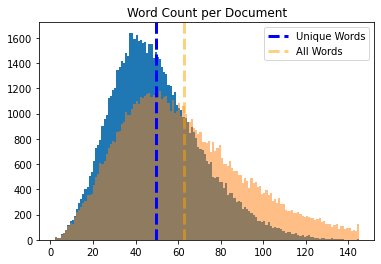

In [ ]:
bin_width = 1
plt.hist(avg_unq_words, bins=np.arange(min(avg_unq_words), max(avg_unq_words) + bin_width, bin_width))
plt.axvline(1/len(arxiv_documents)*sum(avg_unq_words), color='b', linestyle='dashed', linewidth=3)

plt.hist(avg_words, bins=np.arange(min(avg_unq_words), max(avg_unq_words) + bin_width, bin_width), alpha=0.5)
plt.axvline(1/len(arxiv_documents)*sum(avg_words), color='orange', linestyle='dashed', linewidth=3, alpha=0.5)
plt.title("Word Count per Document")
plt.legend(['Unique Words', 'All Words'])
plt.show()

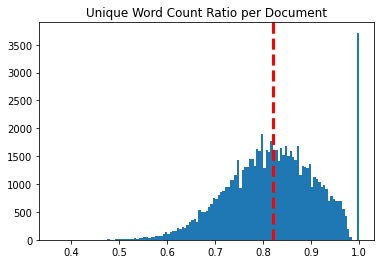

In [ ]:
bin_width = 0.005
plt.hist(avg_unq_words_ratio, bins=np.arange(min(avg_unq_words_ratio), max(avg_unq_words_ratio) + bin_width, bin_width))
plt.axvline(1/len(arxiv_documents)*sum(avg_unq_words_ratio), color='r', linestyle='dashed', linewidth=3)
plt.title("Unique Word Count Ratio per Document")
plt.show()

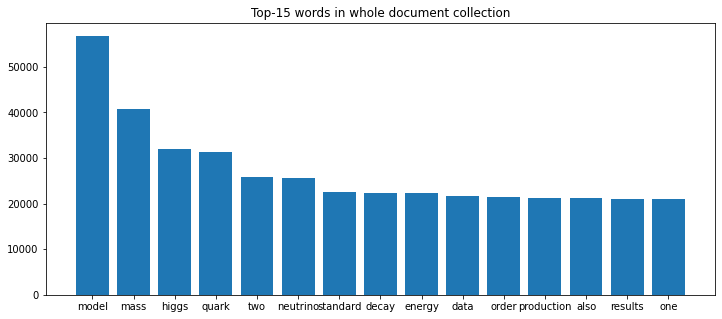

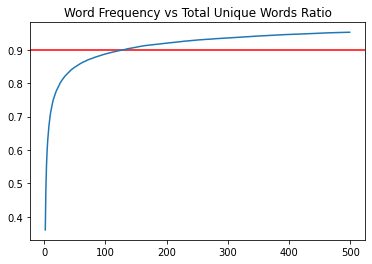

In [ ]:
word_dict = {}
seen_words = []
for doc in arxiv_documents:
    for word in doc:
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1

count_words = sorted(word_dict.items(), key=lambda x: x[1])
k_words = 15
top_words = list(reversed(count_words))[:k_words]

plt.figure(figsize=(12,5))
plt.bar([k for (k,v) in top_words], [v for (k,v) in top_words])
plt.title(f"Top-{k_words} words in whole document collection")
plt.show()

lim = len(set(total_unq_words))
count_ratio = [len([_ for k, v in word_dict.items() if v < i])/lim for i in range(2, 500)]
plt.axhline(y=0.9, color='r', linestyle='-')
plt.plot(np.arange(2, 500), count_ratio)
plt.title("Word Frequency vs Total Unique Words Ratio")
plt.show()

from collections import Counter
infrequent_words = Counter([k for k, v in word_dict.items() if v < 100])

def reduce_document(doc):
  return [word for word in doc if word not in infrequent_words]

reduced_arxiv_documents = [' '.join(reduce_document(document)) for document in arxiv_documents]

<BarContainer object of 15 artists>

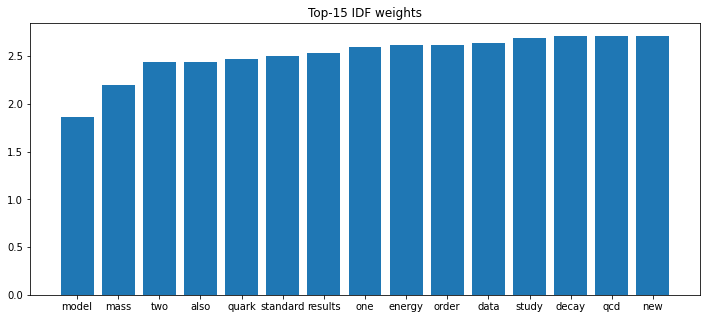

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

class TFIDF:
  def __init__(self):
    pass

  def __call__(self, documents):
    #Runs whole TDIDF process

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(documents)


    return {"tfidf": X, "features": vectorizer.get_feature_names_out(), 'vec': vectorizer}

TFIDF_model = TFIDF()

out = TFIDF_model(reduced_arxiv_documents)

plt.figure(figsize=(12,5))
top_k_idf_names = out['vec'].get_feature_names_out()[np.argsort(out['vec'].idf_)][:15]
top_k_idf_vals = np.sort(out['vec'].idf_)[:15]

plt.title("Top-15 IDF weights")
plt.bar(top_k_idf_names, top_k_idf_vals)

In [ ]:
n_topics = 25

NMF_model = NMF(n_components=n_topics, init='random')

NMF_features = NMF_model.fit_transform(out['tfidf'])

W = normalize(NMF_features)
H = NMF_model.components_
W.shape, H.shape

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


((78180, 25), (25, 3720))

In [ ]:
# NMF Reference: https://www.searchenginejournal.com/topic-clusters-recommender-system/436123/
# Create clustered dataframe the NMF clustered df
components = pd.DataFrame(
    H, 
    columns=[out['vec'].get_feature_names_out()]
    ) 

clusters = {}

# Show top 25 queries for each cluster
for i in range(len(components)):
    clusters[i] = []
    loop = dict(components.loc[i,:].nlargest(10)).items()
    for k,v in loop:
        clusters[i].append({'q':k[0],'sim_score': v})

# Create dataframe using the clustered dictionary
grouping = pd.DataFrame(clusters).T
grouping['topic'] = grouping[0].apply(lambda x: x['q'])
grouping.drop(0, axis=1, inplace=True)
grouping.set_index('topic', inplace=True)

def show_queries(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x['q'])
    return df

# Only display the query in the dataframe
clustered_queries = show_queries(grouping)
clustered_queries

,1,2,3,4,5,6,7,8,9
topic,,,,,,,,,
physics,new,standard,model,beyond,sm,review,future,electroweak,discuss
dark,matter,dm,relic,detection,direct,density,candidate,scalar,particles
spin,functions,parton,polarized,distributions,distribution,structure,transverse,momentum,scattering
top,production,lhc,quark,pair,single,tevatron,couplings,collider,quarks
higgs,boson,bosons,model,doublet,sm,standard,lhc,charged,scalar
loop,one,two,integrals,corrections,level,diagrams,amplitudes,method,results
mixing,matrix,lepton,flavor,angles,angle,matrices,charged,flavour,symmetry
collisions,energy,jet,high,production,hadron,jets,lhc,energies,gluon
next,leading,order,corrections,nlo,qcd,calculation,resummation,nnlo,perturbative


In [ ]:
# Generate xy, random points for each topic
# do clustering based on the midpoint between words that are common among the topics
# otherwise if it only appears oncegenerate a random value between the topic

rand_points = np.random.rand(25, 2)

queries_mat = clustered_queries.to_numpy()
queries = np.unique(queries_mat)

queries_dict = {query: [] for query in queries}

for row in range(queries_mat.shape[0]):
  for query in queries:
   queries_dict[query] += [rand_points[row]] if np.any(queries_mat[row] == query) else []

def midpoint(points):
  n = points.shape[0]
  if n == 1:
    point = points[0]
    X = np.random.uniform(point[0]-0.1, point[0]+0.1)
    Y = np.random.uniform(point[1]-0.1, point[1]+0.1)
    return np.array([n, X, Y])
  return np.array([n, np.sum(points[:, 0])/n, np.sum(points[:, 1])/n])

queries_distances = {}
for k, v in queries_dict.items():
  points = np.array(v)
  queries_distances[k] = midpoint(points)

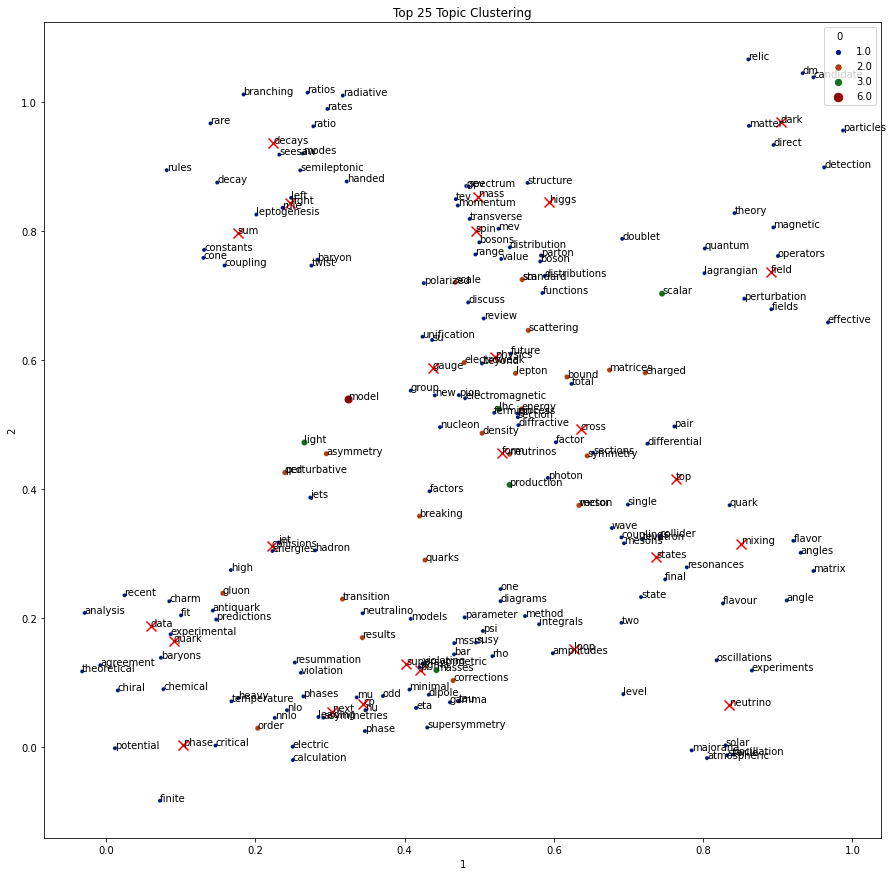

In [ ]:
queries_distances_df = pd.DataFrame(queries_distances).T
queries_distances_np = queries_distances_df.to_numpy()

fig, ax = plt.subplots()
ax.scatter(rand_points[:, 0], rand_points[:, 1], marker='x', c='r', s=100)

for i, txt in enumerate(clustered_queries.index):
    ax.annotate(txt, (rand_points[i, 0], rand_points[i, 1]))

sns.scatterplot(data=queries_distances_df, x=1, y=2, size=0, hue=0, palette='dark', ax=ax)

for i, txt in enumerate(queries_distances_df.index):
  query_row = queries_distances_df.iloc[i].to_numpy()


  ax.annotate(txt, (query_row[1], query_row[2]))


plt.gcf().set_size_inches(15, 15)
plt.title("Top 25 Topic Clustering")
plt.show()

In [ ]:
# Recommend other abstracts using cosine similarity, based on NMF W matrix
# Reference: https://www.searchenginejournal.com/topic-clusters-recommender-system/436123/

def get_recommendations(abstract_title, n_abstracts=20):
  norm_df = pd.DataFrame(W, index=arvix_dataset['title'])
  recommendations = norm_df.loc[abstract_title,:]
  similarities = norm_df.dot(recommendations)
  loop = dict(similarities.nlargest(n_abstracts)).items()
  return pd.DataFrame(loop)

ind = 4
print("Title: ", arvix_dataset['title'][ind])
get_recommendations(arvix_dataset['title'][ind])

Title:  Probing non-standard neutrino interactions with supernova neutrinos


,0,1
0,Probing non-standard neutrino interactions wit...,1.000000
1,Solar Neutrino Oscillations in the Moon,0.970243
2,Lepton Number Violating Electron Recoils in a ...,0.967743
3,Challenges Confronting Superluminal Neutrino M...,0.966951
4,Constraints on the flavor-dependent non-standa...,0.965385
5,Neutrino Masses in Astrophysics and Cosmology,0.965243
6,CP-Violation and Non-Standard Interactions at ...,0.964295
7,Proposition of direct experiment to study the ...,0.964155
8,What does the muon-neutrino oscillate into?,0.961557
9,Extraterrestrial Solar Neutrino Physics,0.961487


In [ ]:
class QueryPaper:
  def __init__(self):
    self.titles = arvix_dataset['title']

  def title_recommendations(self, title, n_titles=20):
    norm_df = pd.DataFrame(W, index=arvix_dataset['title'])
    recommendations = norm_df.loc[title,:]
    similarities = norm_df.dot(recommendations)
    loop = dict(similarities.nlargest(n_titles)).items()
    return pd.DataFrame(loop)

  def query_title_similarity(self, query):
    best_sim = 0
    best_title = ""
    for title in arvix_dataset['title']:
      clean_title = ' '.join(clean_abstract(title))
      clean_query = ' '.join(clean_abstract(query))
      count_vectorizer = CountVectorizer()
      vector_matrix = count_vectorizer.fit_transform([clean_title, clean_query])
      # Cosine similarity sometimes breaks because of matrix alignment for some reason, so just try catch these exceptions
      try:
        cosine_similarity_matrix = cosine_similarity(vector_matrix)
        sim = cosine_similarity_matrix[0, 1]
        if sim > best_sim:
          best_sim = sim
          best_title = title
      except:
        pass



    return [best_title,best_sim]

  def __call__(self, query):
    print(f"Query: {query}")
    best_title, best_sim = self.query_title_similarity(query)
    print(f"Found {np.round(best_sim, 3)} similarity match to: '{best_title}'")
    return self.title_recommendations(best_title)

query_model = QueryPaper()

query_model("Supernova neutrinos")

Query: Supernova neutrinos
Found 0.816 similarity match to: 'Neutrinos and Nucleosynthesis in Supernova'


,0,1
0,Neutrinos and Nucleosynthesis in Supernova,1.000000
1,Active-Sterile Neutrino Transformation and r-P...,0.957054
2,Searching for Heavy Neutrinos with the MoEDAL-...,0.940862
3,Prospects of detecting massive isosinglet neut...,0.933836
4,Oscillation effects on supernova neutrino rate...,0.927074
5,Getting the most from NOvA and T2K,0.923521
6,Constraining active-sterile neutrino transitio...,0.921822
7,Recoilless Resonance Absorption of Tritium Ant...,0.921669
8,Monte Carlo simulations of neutrino and charge...,0.920213
9,Realistic Earth matter effects and a method to...,0.919469


## Part 2: Word2Vec 

In [ ]:
# -*- coding: utf-8 -*-
"""ma544-project-sudo.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1nMy_4AOSllJgBC92CefTqDng0zKzUJp1
"""

import numpy as np
import pandas as pd
import json
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
#from collections import Counter

data = []
for line in open('drive/MyDrive/MA544_files/arxiv-metadata-oai-snapshot.json', 'r'):
    data.append(json.loads(line))
df = pd.DataFrame.from_records(data)

df

df['abstract'] = df['abstract'].str.replace('\n',' ',regex=False)
df['abstract'] = df['abstract'].str.replace('-', '',regex=False)
df['abstract'] = df['abstract'].str.replace('_', '',regex=False)
df['abstract'] = df['abstract'].str.replace('(', '',regex=False)
df['abstract'] = df['abstract'].str.replace(')', '',regex=False)
df['abstract'] = df['abstract'].str.replace('@', '',regex=False)
df['abstract'] = df['abstract'].str.replace('#', '',regex=False)
df['abstract'] = df['abstract'].str.replace('$', '',regex=False)
df['abstract'] = df['abstract'].str.replace('%', '',regex=False)
df['abstract'] = df['abstract'].str.replace('^', '',regex=False)
df['abstract'] = df['abstract'].str.replace('&', '',regex=False)
df['abstract'] = df['abstract'].str.replace('*', '',regex=False)
df['abstract'] = df['abstract'].str.replace('+', '',regex=False)
df['abstract'] = df['abstract'].str.replace('=', '',regex=False)
df['abstract'] = df['abstract'].str.replace('?', '',regex=False)
df['abstract'] = df['abstract'].str.replace('|', '',regex=False)
df['abstract'] = df['abstract'].str.replace('\\', '',regex=False)
df['abstract'] = df['abstract'].str.replace('/', '',regex=False)
df['abstract'] = df['abstract'].str.replace(':', '',regex=False)
df['abstract'] = df['abstract'].str.replace(':', '',regex=False)
df['abstract'] = df['abstract'].str.replace('<', '',regex=False)
df['abstract'] = df['abstract'].str.replace('>', '',regex=False)
df['abstract'] = df['abstract'].str.replace('[', '',regex=False)
df['abstract'] = df['abstract'].str.replace(']', '',regex=False)
df['abstract'] = df['abstract'].str.replace('{', '',regex=False)
df['abstract'] = df['abstract'].str.replace('}', '',regex=False)

df["abstract"][0]

#df['abstract'] = df['abstract'].str.replace(['-','_','(',')','@','#','$','%','^','&','*','+','=','?','|','\\','/',':',';','<','>','[',']','{','}'], '',regex=False)
df

#df["abstract"] = df["title"]+"."+df["abstract"]

df.isnull().sum()

df["categories"].unique()

df_cs = df

drop_idx = []
for index, row in df_cs.iterrows():
    if 'cs.CL' not in row['categories']:
        drop_idx.append(index)
df_cs = df_cs.drop(drop_idx).reset_index(drop=True)
df_cs.to_csv('arxiv_cs-CL.csv', index=False)
df_cs

df_cs_ai = df

drop_idx = []
for index, row in df_cs_ai.iterrows():
    if 'cs.AI' not in row['categories']:
        drop_idx.append(index)
df_cs_ai = df_cs_ai.drop(drop_idx).reset_index(drop=True)
df_cs_ai.to_csv('arxiv_cs_ai.csv', index=False)
df_cs_ai

df_ph = df

drop_idx = []
for index, row in df_ph.iterrows():
    if 'physics' not in row['categories']:
        drop_idx.append(index)
df_ph = df_ph.drop(drop_idx).reset_index(drop=True)
df_ph.to_csv('arxiv_ph.csv', index=False)
df_ph

df_math = df

df_cs_ai = pd.read_csv("/kaggle/input/ma544-project-dataset/arxiv_cs_ai.csv")
df_cs_ai

drop_idx = []
for index, row in df_math.iterrows():
    if 'math' not in row['categories']:
        drop_idx.append(index)
df_math = df_math.drop(drop_idx).reset_index(drop=True)
df_math.to_csv('arxiv_math.csv', index=False)
df_math

abstract_cs = df_cs['abstract']
abstract_df_cs = abstract_cs.to_frame(name='abstract')
abstract_cs

abstract_ph = df_ph['abstract']
abstract_df_ph = abstract_ph.to_frame(name='abstract')
abstract_ph

abstract_math = df_math['abstract']
abstract_df_math = abstract_math.to_frame(name='abstract')
abstract_math

abstract_cs_ai = df_cs_ai['abstract']
abstract_df_cs_ai = abstract_cs_ai.to_frame(name='abstract')
abstract_cs_ai

df_cs['categories'].value_counts().head(20)

df_ph['categories'].value_counts().head(20)

df_math['categories'].value_counts().head(50)

df_cs_ai['categories'].value_counts().head(100)

df_cs_csCL = df_cs.loc[df_cs['categories'] == 'cs.CL']
df_cs_csCLnAI = df_cs.loc[df_cs['categories'] == 'cs.CL cs.AI']
df_cs_csCLnLG = df_cs.loc[df_cs['categories'] == 'cs.CL cs.LG']
df_cs_csCLnAInLG = df_cs.loc[df_cs['categories'] == 'cs.CL cs.AI cs.LG']
df_cs_cmp_lgnCL = df_cs.loc[df_cs['categories'] == 'cmp-lg cs.CL']

df_ph_optics = df_ph.loc[df_ph['categories'] == 'physics.optics']
df_ph_flu_dyn = df_ph.loc[df_ph['categories'] == 'physics.flu-dyn']
df_ph_gen_ph = df_ph.loc[df_ph['categories'] == 'physics.gen-ph']
df_ph_plasm_ph = df_ph.loc[df_ph['categories'] == 'physics.plasm-ph']
df_ph_atom_ph = df_ph.loc[df_ph['categories'] == 'physics.atom-ph']

df_math_AP = df_math.loc[df_math['categories'] == 'math.AP']
df_math_CO = df_math.loc[df_math['categories'] == 'math.CO']
df_math_PR = df_math.loc[df_math['categories'] == 'math.PR']
df_math_cs_ITnmath_IT = df_math.loc[df_math['categories'] == 'cs.IT math.IT']
df_math_NT = df_math.loc[df_math['categories'] == 'math.NT']

df_cs_ai_AI = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.AI']
df_cs_ai_AI = df_cs_ai_AI['abstract']
df_cs_ai_AI=df_cs_ai_AI.to_frame()

df_cs_ai_LG = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.LG cs.AI']
df_cs_ai_LG = df_cs_ai_LG['abstract']
df_cs_ai_LG=df_cs_ai_LG.to_frame()

df_cs_ai_CL = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.CL cs.AI']
df_cs_ai_CL = df_cs_ai_CL['abstract']
df_cs_ai_CL=df_cs_ai_CL.to_frame()

df_cs_ai_CV = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.CV cs.AI']
df_cs_ai_CV = df_cs_ai_CV['abstract']
df_cs_ai_CV=df_cs_ai_CV.to_frame()

df_cs_ai_LGnML = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.LG cs.AI stat.ML']
df_cs_ai_LGnML = df_cs_ai_LGnML['abstract']
df_cs_ai_LGnML=df_cs_ai_LGnML.to_frame()

df_cs_ai_LGnML_list = df_cs_ai_LGnML.abstract.to_list()

df_cs_ai_AInDS = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.DS cs.AI']
df_cs_ai_AInDS = df_cs_ai_AInDS['abstract']
df_cs_ai_AInDS=df_cs_ai_AInDS.to_frame()

df_cs_ai_AInDS_list = df_cs_ai_AInDS.abstract.to_list()

target = df_cs_ai_AInDS_list[1]

sentences_similarity = np.zeros(len(df_cs_ai_AInDS_list))
sentences_similarity.shape

# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import matplotlib.pyplot as plt
import pprint
from gensim.models import word2vec
from gensim.models import KeyedVectors
# %matplotlib inline

#w2v = word2vec.Word2Vec()
w2v = KeyedVectors.load_word2vec_format("/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin", binary=True)

w2v_vocab = list(w2v.index_to_key)
print("Loaded {} words in vocabulary".format(len(w2v_vocab)))

target_sentence_words = [w for w in target.split() if w in w2v_vocab]
for idx, sentence in enumerate(df_cs_ai_AInDS_list):
    sentence_words = [w for w in sentence.split() if w in w2v_vocab]
    sim = w2v.n_similarity(target_sentence_words, sentence_words)
    sentences_similarity[idx] = sim

result = list(zip(sentences_similarity, df_cs_ai_AInDS_list))
result.sort(key=lambda item:item[0], reverse=True)
print("Target:", target)
pprint.pprint(result)

result[0]

target

result[1]

result[2]

result[3]

from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(collocations = False).generate(target)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

word_cloud = WordCloud(collocations = False).generate(result[1][1])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

word_cloud = WordCloud(collocations = False).generate(result[2][1])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

word_cloud = WordCloud(collocations = False).generate(result[3][1])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Part 3: Paper Rank

In [ ]:
!pip install arxiv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=5e42467a1a6f8690c6e0275fa76900bf75dba85967a014e13308da9aa500ff59
  Stored in directory: /root/.cache/pip/wheels/83/63/2f/117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built sgmllib3k


In [ ]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
from numpy import linalg as LA

import matplotlib.pyplot as plt
import networkx as nx

from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

import time

import arxiv

from google.colab import files
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

with open('/content/drive/MyDrive/MA 544 Final Project/internal-citations.json') as json_data:
    citation_data = json.load(json_data)

In [ ]:
def preprocess(data, n):

    type(n) == 'int'
    type(data) == 'dict'

    papers = dict(data.copy())

    for key in data:
        
        #remove self citations
        if key in papers[key]:
            papers[key].remove(key)
        
         #remove papers less than n citations
        if len(papers[key]) < n:
            del papers[key]
        
    return papers, len(papers)

In [ ]:
papers, paper_len = preprocess(citation_data, 1)
#remove all papers that have no citations

print("There are", paper_len, "papers with more than 1 citation other than citing themselves")

There are 864117 papers with more than 1 citation other than citing themselves


In [ ]:

#indexing all citations
cites = []
for i in papers:
    for j in papers[i]:
        cites.append(j)

cites = [*set(cites)]
cites_ = list(range(len(cites)))

#call paper, return index
index_c = {cites[i]: cites_[i] for i in range(len(cites))}

#call index, return paper
c_index = {cites_[i]: cites[i] for i in range(len(cites))}


In [ ]:
#CSR Matrix representation

r = []
c = []
v = []

nnz_count = 0
r.append(nnz_count)

for key in papers:
    nnz_count += len(citation_data[key])  
    r.append(nnz_count)
    
    for cite in papers[key]:
        c.append(index_c[cite])
        v.append(1/len(papers[key]))

In [ ]:
print(len(r))
print(len(c))
print(len(v))
print(len(cites))

864118
7861261
7861261
841150


In [ ]:
n = max(len(cites)-1, len(r)-1)

In [ ]:
P = csr_matrix((v, c, r), shape=(n, n))

In [ ]:
def power_method_rank(Q, max_iter):
    
    type(Q) == 'csr_matrix'
    
    n = Q.shape[1]
    
    z = np.random.rand(n) # z random initialization
    z = z / np.linalg.norm(z,ord=1) # z should be of unit 1-norm.

    alpha=0.85 # Damping factor
    # Peronalization vector must be of unit norm
    v = np.ones((Q.shape[1],), dtype='float64')
    v = v / np.linalg.norm(v,ord=1) 

    # Power iteration loop
    count = 0
    
    for k in range(max_iter):
        count += 1
        check = count%50
        y=alpha*Q.dot(z)

        beta = 1.0 - np.linalg.norm(y,ord=1)

        z = y + beta * v

        residual = LA.norm(y-z,ord=1)
        
        #after x iterations residual check
        if check == 0: 
            
            if residual < 0.000001:
                break
    return z, count 

In [ ]:

z, count = power_method_rank(P,400)

z = z / np.linalg.norm(z,ord=1)

print("The dominant eigenvector:\n", z)
print("\n Raking from lower to higher:",np.argsort(z)+1)
print(count)

The dominant eigenvector:
 [1.1572507e-06 1.1572507e-06 1.1572507e-06 ... 1.1572507e-06 1.1572507e-06
 1.1572507e-06]

 Raking from lower to higher: [195060 531268 232574 ...  36828 255898  17393]
400


In [ ]:
m = max(z)
z_normal = []
for i in z:
    z_normal.append(i/m)

In [ ]:
min(z), max(z)

(1.1572506963755638e-06, 1.157250696375643e-06)

In [ ]:
index_rankZ = np.argsort(z)+1
index_rankZnormal = np.argsort(z)+1


In [ ]:
lowhi_rank = []
for i in index_rankZ:
    if i not in c_index:
        continue;
    else:    
        lowhi_rank.append(c_index[i])

In [ ]:
#highest ranked to lowest ranked

paper_rank = list(reversed(lowhi_rank))

output = 10
rank = 1
for paper_id in paper_rank[0:output]:
    
    search = arxiv.Search(id_list=[paper_id])
    paper = next(search.results())
    print('Rank:', rank)
    print(paper.title)
    print("")
    rank += 1

Rank: 1
Non-Abelian Strings: From Weak to Strong Coupling and Back via Duality

Rank: 2
The Tensor Theory Space

Rank: 3
On Free Field Realizations of $W(2,2)$-Modules

Rank: 4
Superstring Field Theory with Open and Closed Strings

Rank: 5
Twists and resonance of L-functions, I

Rank: 6
Diversity of the Supernova - Gamma-Ray Burst Connection

Rank: 7
Nonlinear Propagation of Light in One Dimensional Periodic Structures

Rank: 8
Light Weakly Coupled Axial Forces: Models, Constraints, and Projections

Rank: 9
Discrete torsion in non-geometric orbifolds and their open-string descendants

Rank: 10
Magnetic fields in the Galactic halo restrict fountain-driven recycling and accretion

